# 手机数据分布分析
* record_num: 栅格内出现的停驻数，30天
* user_num: 栅格内出现的用户数，30天
* user_num2: 栅格内出现（有10天以上记录的）用户数，30天

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_rows',3000)

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

os.chdir('E:\\zy城市群数据分析\\190512导出看数据分布')

In [2]:
temporal = pd.read_csv('./时段-记录数.csv')
temporal.columns = ['ranknum','st','et','cnt']
temporal['day'] = temporal.st.apply(lambda x: x[8:10])

In [3]:
temporal.head()

,ranknum,st,et,cnt,day
0,1,2018-11-01 00,2018-11-01 00,320885,01
1,1,2018-11-01 00,2018-11-01 01,146200,01
2,1,2018-11-01 00,2018-11-01 02,87708,01
3,1,2018-11-01 00,2018-11-01 03,67810,01
4,1,2018-11-01 00,2018-11-01 04,82051,01


In [51]:
temporal.cnt.sum()

1484301912

In [86]:
temporal.groupby('day').cnt.sum().mean()

49476730.4

In [4]:
dailyNum = temporal.groupby('day').cnt.sum().reset_index()

''

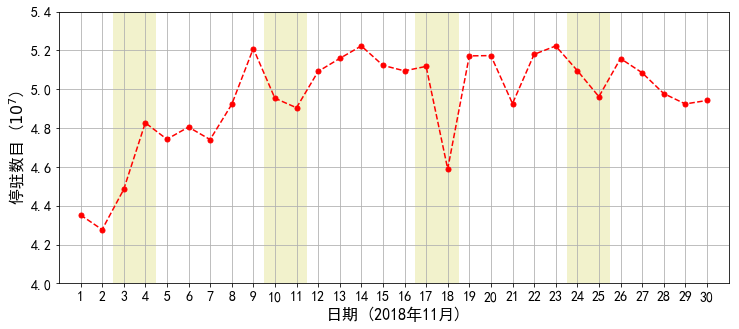

In [88]:
plt.figure(figsize=(12,5))
plt.plot(dailyNum.cnt / pow(10,7),'o--',c='r',markersize=5)
plt.xlim([-1,30])
plt.ylim([4,5.4])
plt.xticks(np.arange(30),[str(x) for x in range(1,32)]);
plt.xlabel('日期 (2018年11月)',fontsize=16)
plt.ylabel('停驻数目 ($10^7$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

for x in [3,4,10,11,17,18,24,25]:
    plt.bar(x-1,bottom=4, width=1,height=1.4, color='y', align='center',alpha=0.2)

plt.grid()
plt.savefig('C:\\Users\Administrator\Desktop\zd.png',bbox_inches='tight',pad_inches=0,dpi=600)
;

In [10]:
temporal['shour'] = temporal.st.apply(lambda x: x[-2:])
temporal['ehour'] = temporal.et.apply(lambda x: x[-2:])

hour = temporal.groupby(['shour','ehour']).cnt.sum().reset_index()   # 求总值

In [11]:
mat = pd.pivot(hour, index='shour', columns='ehour', values='cnt')
mat.index = range(24)
mat.columns = range(24)

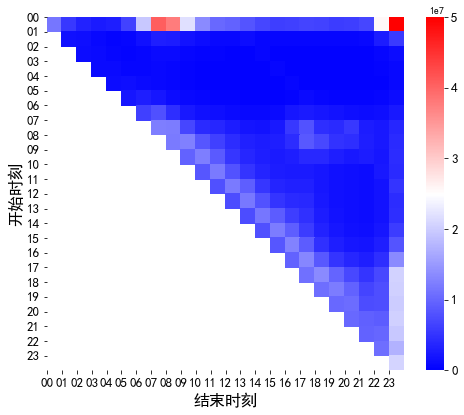

In [12]:
plt.figure(figsize=(8,6.5))
# fig, ax = plt.subplots(figsize=(8,6.5))
ax = sns.heatmap(mat,cmap='bwr',vmin=0, vmax=50000000)
plt.ylabel('开始时刻',fontsize=16)
plt.xlabel('结束时刻',fontsize=16)

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=13)

plt.xticks(np.arange(24),[str(x).zfill(2) for x in range(24)],rotation=0);
plt.yticks(np.arange(24),[str(x).zfill(2) for x in range(24)],rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.title('2018-11-25 (weekend)',fontsize=18)

plt.savefig('C:\\Users\Administrator\Desktop\zs.png',bbox_inches='tight',pad_inches=0,dpi=600)

In [13]:
temporal['stime'] = temporal.st.apply(lambda r: datetime.datetime.strptime(r,'%Y-%m-%d %H'))
temporal['etime'] = temporal.et.apply(lambda r: datetime.datetime.strptime(r,'%Y-%m-%d %H'))
temporal['duration'] = temporal[['stime','etime']].apply(lambda r: (r.etime-r.stime).seconds / 60, axis=1)

In [14]:
tt = temporal.groupby('duration').cnt.sum() / temporal.cnt.sum()
tt = tt.reset_index()

''

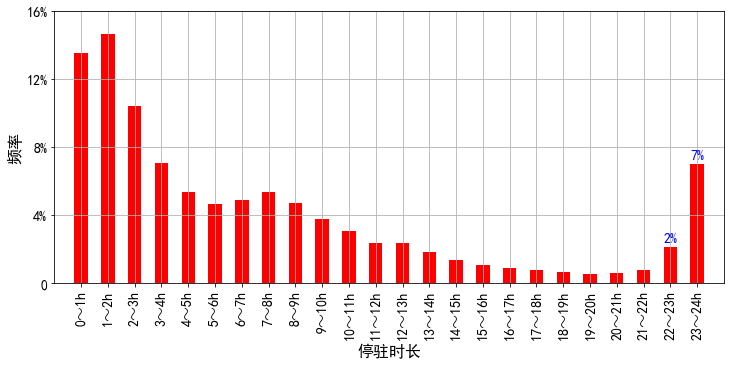

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
def rgb(R,G,B): return "#%02X%02X%02X" % (R,G,B)

plt.bar(range(len(tt)),tt.cnt,width=0.5,align='center',color='r')
# tt.cnt.plot(ax=ax,linestyle='dashed',color='b',marker='o',markerfacecolor='b', markersize=5)
# tt.hist(column='cnt',ax=ax)

# plt.title('',fontsize=18)
plt.xlabel('停驻时长',fontsize=16)
plt.ylabel('频率',fontsize=16)
plt.xlim([-1,24])
plt.xticks(np.arange(0,24),[str(x)+'～'+str(x+1)+'h' for x in range(24)],rotation=90)
# plt.xticks(np.arange(0,24),['0-1h','1~2h','2~3h','3~4h','4~5h','5~6h','6~7h','7~8h','8~9h','9~10h',\
#                                    '10~11h','11~12h','12~13h','13~14h','14~15h','15~16h','16~17h','17~18h',\
#                                     '18~19h','19~20h','20~21h','21~22h','22~23h','23~24h'],rotation=90)
plt.ylim([0,0.16])
# plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.yticks([0,0.04,0.08,0.12,0.16],['0','4%','8%','12%','16%'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

# for i,v in enumerate(tt.cnt):
#     ax.text(i,v+0.005, str(int(v*100))+'%',color='b',horizontalalignment='center',verticalalignment='center',fontsize=14, fontweight='bold')
i = 22
v = tt.loc[i,'cnt']
ax.text(i,v+0.005, str(int(v*100))+'%',color='b',horizontalalignment='center',verticalalignment='center',fontsize=14, fontweight='bold')
j = 23
v = tt.loc[j,'cnt']
ax.text(j,v+0.005, str(int(v*100))+'%',color='b',horizontalalignment='center',verticalalignment='center',fontsize=14, fontweight='bold')

plt.savefig('C:\\Users\Administrator\Desktop\zt3.png',bbox_inches='tight',pad_inches=0,dpi=600)
;

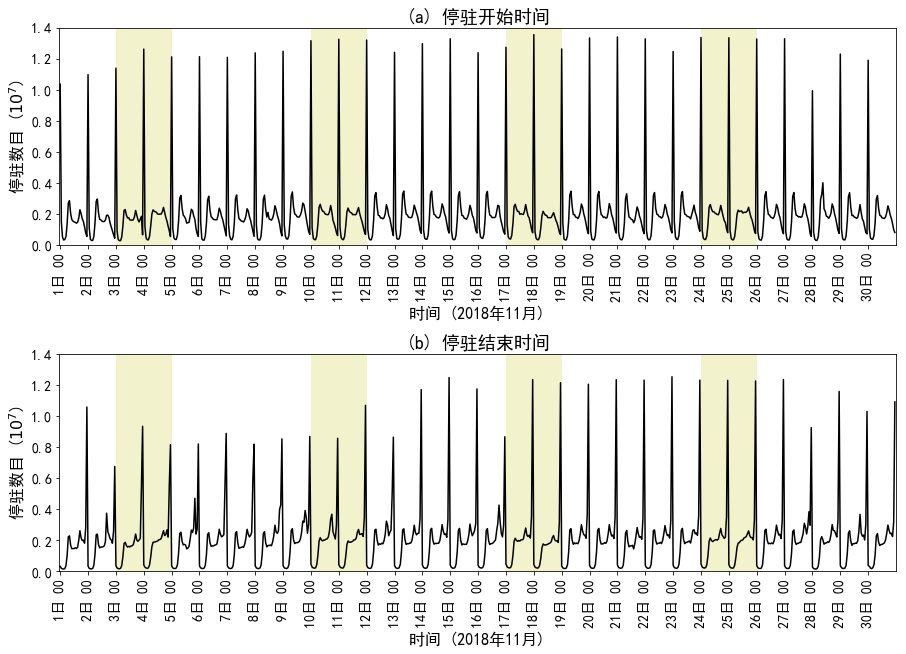

In [24]:
s30 = temporal.groupby('st').cnt.sum().reset_index()
e30 = temporal.groupby('et').cnt.sum().reset_index()

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(s30.cnt / pow(10,7),'-',c='black')
plt.xlim([-1,30*24])
plt.ylim([0,1.4])
plt.xticks(np.arange(0,24*30,24),[str(x)+'日 00' for x in range(1,32)],rotation=90)
# plt.yticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4],['0','0.2','0.4','0.6','0.8','1.0','1.2','>1.4'])
plt.xlabel('时间 (2018年11月)',fontsize=16)
plt.ylabel('停驻数目 ($10^7$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('(a) 停驻开始时间',fontsize=18)

for x in [3,4,10,11,17,18,24,25]:
    plt.bar((x-1)*24,bottom=0, width=24,height=4, color='y', align='edge',alpha=0.2)

plt.subplot(2,1,2)
plt.plot(e30.cnt / pow(10,7),'-',c='black')
plt.xlim([-1,30*24])
plt.ylim([0,1.4])
plt.xticks(np.arange(0,24*30,24),[str(x)+'日 00' for x in range(1,32)],rotation=90)
# plt.yticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4],['0','0.2','0.4','0.6','0.8','1.0','1.2','>1.4'])
plt.xlabel('时间 (2018年11月)',fontsize=16)
plt.ylabel('停驻数目 ($10^7$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('(b) 停驻结束时间',fontsize=18)

for x in [3,4,10,11,17,18,24,25]:
    plt.bar((x-1)*24,bottom=0, width=24,height=4, color='y', align='edge',alpha=0.2)

plt.subplots_adjust(hspace=0.5)
plt.savefig('C:\\Users\Administrator\Desktop\zd3.png',bbox_inches='tight',pad_inches=0,dpi=600)

Text(0.5,1,'(b) 停驻结束时间')

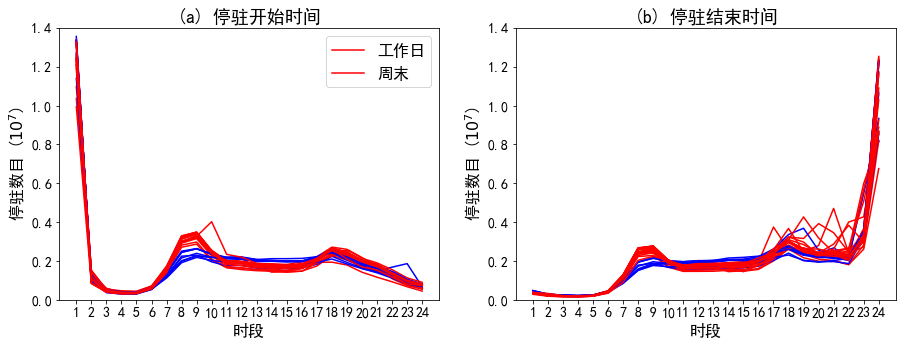

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for x in range(1,32):
    sd = s30[s30.st.str.contains('2018-11-'+str(x).zfill(2))].reset_index()
    if x in [3,4,10,11,17,18,24,25]:color='blue'
    else: color = 'red'
    plt.plot(sd.cnt / pow(10,7),'-',c=color)
plt.xticks(range(24),np.arange(24)+1)
plt.ylim([0,1.4])
plt.xlabel('时段',fontsize=16)
plt.ylabel('停驻数目 ($10^7$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('(a) 停驻开始时间',fontsize=18)
plt.legend(['工作日','周末'], loc='upper right', fontsize=16)

plt.subplot(1,2,2)
for x in range(1,32):
    ed = e30[s30.st.str.contains('2018-11-'+str(x).zfill(2))].reset_index()
    if x in [3,4,10,11,17,18,24,25]:color='blue'
    else: color = 'red'
    plt.plot(ed.cnt / pow(10,7),'-',c=color)
plt.xticks(range(24),np.arange(24)+1)
plt.ylim([0,1.4])
plt.xlabel('时段',fontsize=16)
plt.ylabel('停驻数目 ($10^7$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('(b) 停驻结束时间',fontsize=18)

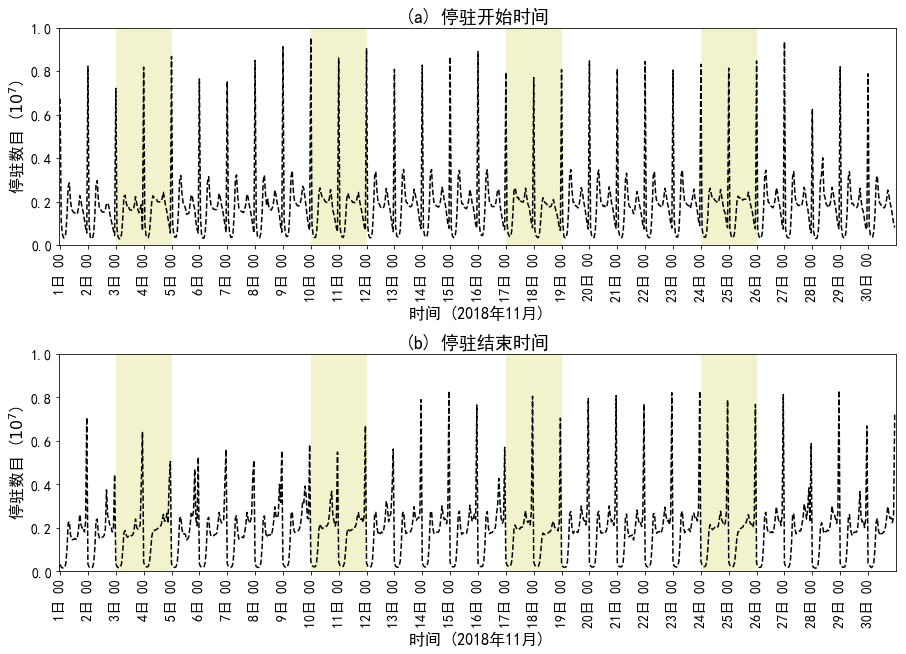

In [17]:
# 去除22-24h数据
temporal2 = temporal[temporal.duration < 22*60]
# temporal2 = temporal[~(((temporal.shour!='00') | (temporal.ehour!='23')) & (temporal.duration > 20*60))]
s30 = temporal2.groupby('st').cnt.sum().reset_index()
e30 = temporal2.groupby('et').cnt.sum().reset_index()

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(s30.cnt / pow(10,7),'--',c='black')
# plt.plot(e30.cnt / pow(10,7),'--',c='b')
plt.xlim([-1,30*24])
plt.ylim([0,1.0])
plt.xticks(np.arange(0,24*30,24),[str(x)+'日 00' for x in range(1,32)],rotation=90);
plt.xlabel('时间 (2018年11月)',fontsize=16)
plt.ylabel('停驻数目 ($10^7$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('(a) 停驻开始时间',fontsize=18)

for x in [3,4,10,11,17,18,24,25]:
    plt.bar((x-1)*24,bottom=0, width=24,height=4, color='y', align='edge',alpha=0.2)

plt.subplot(2,1,2)
plt.plot(e30.cnt / pow(10,7),'--',c='black')
plt.xlim([-1,30*24])
plt.ylim([0,1.0])
plt.xticks(np.arange(0,24*30,24),[str(x)+'日 00' for x in range(1,32)],rotation=90);
plt.xlabel('时间 (2018年11月)',fontsize=16)
plt.ylabel('停驻数目 ($10^7$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('(b) 停驻结束时间',fontsize=18)

for x in [3,4,10,11,17,18,24,25]:
    plt.bar((x-1)*24,bottom=0, width=24,height=4, color='y', align='edge',alpha=0.2)
# plt.legend(['开始时间','结束时间'], loc='upper right', fontsize=16)
plt.subplots_adjust(hspace=0.5)
# plt.savefig('C:\\Users\Administrator\Desktop\zd2.png',bbox_inches='tight',pad_inches=0,dpi=600)

In [ ]:
# 去除22-24h数据
# temporal2 = temporal[temporal.duration < 22*60]
temporal2 = temporal[(temporal.shour!='00') | (temporal.ehour!='23')]
s30 = temporal2.groupby('st').cnt.sum().reset_index()
e30 = temporal2.groupby('et').cnt.sum().reset_index()

plt.figure(figsize=(20,5))
plt.plot(s30.cnt / pow(10,7),'--',c='r')
# plt.plot(e30.cnt / pow(10,7),'--',c='b')
plt.xlim([-1,30*24])
plt.ylim([0,0.4])
plt.xticks(np.arange(0,24*30,24),[str(x)+'日 00' for x in range(1,32)],rotation=90);
plt.xlabel('时间 (2018年11月)',fontsize=16)
plt.ylabel('停驻数目 ($10^7$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

for x in [3,4,10,11,17,18,24,25]:
    plt.bar((x-1)*24,bottom=0, width=24,height=4, color='y', align='edge',alpha=0.2)

plt.legend(['开始时间','结束时间'], loc='upper right', fontsize=16)
    
# plt.savefig('C:\\Users\Administrator\Desktop\zd2.png',bbox_inches='tight',pad_inches=0,dpi=600)